## 💡WHAT ARE THE MOST OPTIMAL SKILLS FOR DATA ANALYST? 

* STEPS: 
    1. Import all necessary libraries, datasets & clean up data
    2. Evaluate the median salary for each skill
    3. Evaluate the percentage of each skill appearing in job postings 
    4. Plot the data using a scatter chart 


## Step 1: Import all necessary libraries, datasets & Clean all data 

Similar to [1_Skills_Demand.ipynb](1_Skills_Demand.ipynb), we will have to go import all the necessary libraries, load the datasets and clean up those data in order to use them efficiently. 

In [1]:
#Import 
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

#Load datasets 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas() 

#Clean data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_exploded = df.explode(column='job_skills') 

#Filter out 'Data Analyst' job titles
df_US = df_exploded[df_exploded['job_title_short'] == 'Data Analyst'].copy() 
df_US = df_US.dropna(subset='salary_year_avg')
df.dropna(subset=['salary_year_avg'],inplace=True) 

## Step 2: Evaluate the median salary for each skill 

Using the `.groupby()` function, I created a DataFrame that counts the occurrences of each skill in all job postings and calculates the corresponding median salary.

In [ ]:
df_data = df_US.groupby('job_skills')['salary_year_avg'].agg(
    skill_count = 'count',
    median_salary = 'median'
)

df_data

,skill_count,median_salary
job_skills,,
airflow,72,111175.0
airtable,6,90000.0
alteryx,124,105000.0
angular,12,109101.0
ansible,2,124370.0
...,...,...
word,523,80000.0
workfront,3,75000.0
wrike,1,75000.0


## Step 3: Evaluate the percentage of each skill appearing in job postings 

Similar to [1_Skills_Demand.ipynb](1_Skills_Demand.ipynb), I will use percentages to provide a clearer understanding of how often each skill appears. More specifically, I will divide the `skill_count` column with the amount of the 'Data Analyst' jobs in the original dataframe. 

In [80]:
df_data['skill_percent'] = df_data['skill_count'] / len(df[df['job_title_short'] == 'Data Analyst']) * 100 

In [81]:
df_data.sort_values(by='skill_count',ascending=False)

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
...,...,...,...
selenium,1,82500.0,0.018345
colocation,1,67500.0,0.018345
cordova,1,113269.5,0.018345


From the dataframe above, I want to plot only the skills that are relevant. More specifically, skills that appears in more than 5% of the 'Data Analyst' job postings. 

In [ ]:
df_data = df_data[df_data['skill_percent'] > 5]
df_data = df_data.sort_values(by='skill_percent',ascending=False) 


In [ ]:
#Here's all the skills that are relevant to Data Analysts 
df_data

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
power bi,1042,90000.0,19.115759
sas,1006,90000.0,18.455329
word,523,80000.0,9.594570
powerpoint,518,85000.0,9.502844


## Step 4: Plot the data using a scatter chart 

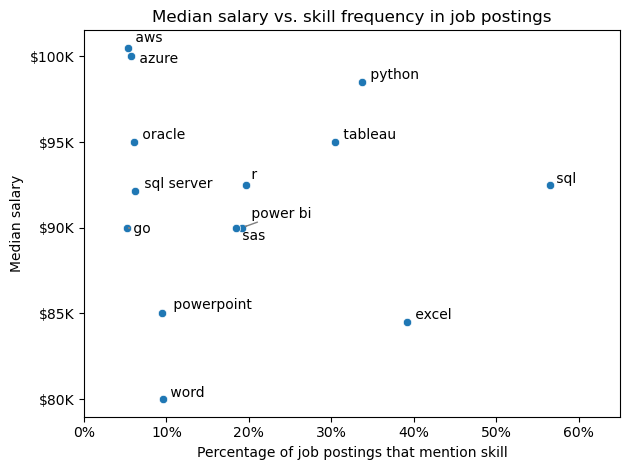

In [76]:
sns.scatterplot(data=df_data,x='skill_percent',y='median_salary')
plt.xlim(0,65)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
plt.xlabel('Percentage of job postings that mention skill')
plt.ylabel('Median salary') 
plt.title('Median salary vs. skill frequency in job postings') 

texts = []
for i, txt in enumerate(df_data.index):
    texts.append(plt.text(df_data['skill_percent'].iloc[i], df_data['median_salary'].iloc[i]," " + txt))
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray')) 

plt.tight_layout()
plt.show()